In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.datasets import fetch_california_housing

In [3]:
dataset = fetch_california_housing()

In [4]:
d1 = pd.DataFrame(dataset.data,columns=dataset.feature_names)
d2 = pd.DataFrame(dataset.target,columns=['price'])
df = pd.concat([d1,d2],axis=1)

In [5]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [6]:
x = df.iloc[:,0:-1]
y = df.iloc[:,-1]

In [7]:
x

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [8]:
y

0        4.526
1        3.585
2        3.521
3        3.413
4        3.422
         ...  
20635    0.781
20636    0.771
20637    0.923
20638    0.847
20639    0.894
Name: price, Length: 20640, dtype: float64

In [9]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.33,random_state=42)

In [10]:
x_train.shape,x_test.shape

((13828, 8), (6812, 8))

In [11]:
y_train.shape,y_test.shape

((13828,), (6812,))

<AxesSubplot: >

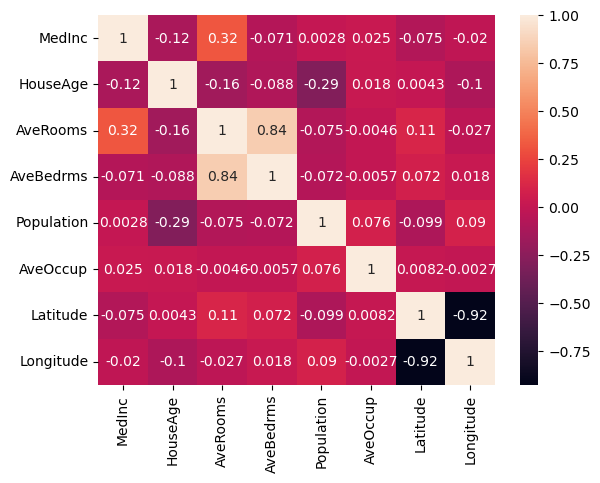

In [13]:
#check corrlation
sns.heatmap(x_train.corr(),annot=True)

In [17]:
#feature selection multicorelanity
def check_correlation(dataset,threshold):
    corr_col = set()
    dataset_corr = dataset.corr()
    
    for i in range(len(dataset_corr.columns)):
        for j in range(i):
            if abs(dataset_corr.iloc[i,j])>threshold:
                corr_name = dataset.columns[i]
                corr_col.add(corr_name)
    return corr_col

In [21]:
a = check_correlation(x_train,0.90)

In [47]:
a

{'Longitude'}

In [22]:
x_train.drop(a,axis=1,inplace=True)

In [23]:
x_test.drop(a,axis=1,inplace=True)

In [25]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()

In [26]:
x_train = scale.fit_transform(x_train)
x_test = scale.transform(x_test)

In [28]:
#simple Linear rigression
from sklearn.linear_model import LinearRegression
regrassor = LinearRegression()

In [29]:
regrassor.fit(x_train,y_train)

LinearRegression()

In [30]:
y_pred = regrassor.predict(x_test)

In [31]:
from sklearn.metrics import r2_score
score = r2_score(y_test,y_pred)
score

0.5358650386939121

In [33]:
1 - (1-score)*(len(y_test))/(len(y_test)-x_test.shape[1]-1)

0.5353193185747986

In [36]:
#ridge
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.linear_model import Ridge
ridge = Ridge()

ridge.fit(x_train,y_train)
y_pred1 = ridge.predict(x_test)
score = r2_score(y_test,y_pred1)
ad = 1 - (1-score)*(len(y_test))/(len(y_test)-x_test.shape[1]-1)
mse = mean_squared_error(y_test,y_pred1)
mae = mean_absolute_error(y_test,y_pred1)
rmse = np.sqrt(mse)

In [37]:
print(score,ad,mse,mae,rmse)

0.5358848426363914 0.5353391458023365 0.618476060023326 0.572781835367036 0.7864324891707654


In [40]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.linear_model import Lasso
lasso = Lasso()

lasso.fit(x_train,y_train)
y_pred1 = lasso.predict(x_test)
score = r2_score(y_test,y_pred1)
ad = 1 - (1-score)*(len(y_test))/(len(y_test)-x_test.shape[1]-1)
mse = mean_squared_error(y_test,y_pred1)
mae = mean_absolute_error(y_test,y_pred1)
rmse = np.sqrt(mse)

In [39]:
print(score,ad,mse,mae,rmse)

-2.5448582275933163e-05 -0.0012012574577402457 1.3326257277946882 0.9126511897647483 1.15439409553007


In [41]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.linear_model import ElasticNet
e = ElasticNet()

e.fit(x_train,y_train)
y_pred1 = e.predict(x_test)
score = r2_score(y_test,y_pred1)
ad = 1 - (1-score)*(len(y_test))/(len(y_test)-x_test.shape[1]-1)
mse = mean_squared_error(y_test,y_pred1)
mae = mean_absolute_error(y_test,y_pred1)
rmse = np.sqrt(mse)

In [42]:
print(score,ad,mse,mae,rmse)

0.2037836424749634 0.20284746803930787 1.0610314011839272 0.8119183692654035 1.0300637850074759


In [43]:
import pickle 

In [44]:
pickle.dump(ridge,open('ridge.pkl','wb'))
pickle.dump(scale,open('scale1.pkl','wb'))

In [45]:
ri = pickle.load(open('ridge.pkl','rb'))
sc = pickle.load(open('scale1.pkl','rb'))

In [48]:
ri.predict(sc.transform([[8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88]]))

array([4.15790304])

In [49]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
